# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [3]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
100% 235k/235k [00:00<00:00, 466kB/s]
100% 235k/235k [00:00<00:00, 465kB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [2]:
#import the libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler



from keras.models import Sequential
from keras.layers import GRU, Dense, LSTM, Dropout, Activation
from sklearn.metrics import mean_squared_error
import math


from scipy.special import inv_boxcox
import matplotlib.pyplot as plt
from keras.optimizers import SGD,Adam
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
# Function For Evaluating The Models
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [5]:
df = pd.read_csv('/content/Traffic Data.csv')
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [104]:
df['rain_1h'].unique()

array([ 0.  ,  0.25,  1.78,  2.79,  0.44,  2.26,  0.28,  1.86,  1.02,
        4.  ,  0.89,  9.62,  5.08,  1.15,  3.05,  3.45,  2.85,  4.79,
        1.82,  5.42,  1.85,  5.19,  2.62,  1.52,  0.85,  0.38,  0.76,
        1.27,  2.54, 10.6 ,  0.51,  2.86,  0.34,  2.29,  1.01,  2.03,
        2.16,  1.1 ,  3.1 ,  3.94,  5.84,  0.69,  1.14,  1.4 ,  1.66,
        1.68,  3.4 ,  2.48,  0.93,  1.06,  4.15,  2.2 ,  2.41,  2.76,
        0.86,  0.8 ,  1.6 ,  0.42,  0.71,  4.06,  0.61,  0.81,  0.43,
        0.98,  1.72,  1.21,  7.11,  0.3 ,  2.88,  0.29,  0.32,  2.61,
        1.3 ,  5.12,  0.63,  1.45,  5.62,  0.35,  0.64,  3.18,  2.92,
        2.6 ,  2.96,  4.74,  1.65,  3.3 ,  0.66])

In [105]:
df['snow_1h'].unique()

array([0.])

In [106]:
df['snow_1h'].sample(20)

11605    0.0
11992    0.0
974      0.0
1486     0.0
18429    0.0
6182     0.0
9535     0.0
3129     0.0
6560     0.0
19051    0.0
9101     0.0
16061    0.0
4477     0.0
688      0.0
10455    0.0
4043     0.0
4910     0.0
16904    0.0
3362     0.0
13446    0.0
Name: snow_1h, dtype: float64

In [6]:
#drop this columns because is just have 0 values
df = df.drop('snow_1h',axis=1)

In [7]:
df.head()

,traffic_volume,temp,rain_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [7]:
#check for null values
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [165]:
#check for duplicated values
df.duplicated().sum()

12

In [8]:
#drop duplicated values
df.drop_duplicates()

,traffic_volume,temp,rain_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00


In [167]:
#See the rows have null values
df['traffic_volume'].isnull()

,traffic_volume
0,False
1,False
2,False
3,False
4,False
...,...
19995,False
19996,False
19997,False
19998,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   clouds_all           20000 non-null  int64  
 4   weather_main         20000 non-null  object 
 5   weather_description  20000 non-null  object 
 6   date_time            20000 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.1+ MB


In [9]:
#replace the missing value with the mean of all columns
#I do it now beacause the seasonal plot don’t get missing values
df.fillna(df['traffic_volume'].mean(),inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       20000 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   clouds_all           20000 non-null  int64  
 4   weather_main         20000 non-null  object 
 5   weather_description  20000 non-null  object 
 6   date_time            20000 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.1+ MB


In [169]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [97]:
#for traffic_volume
result1 = seasonal_decompose(df['traffic_volume'],model='additive',period=365)

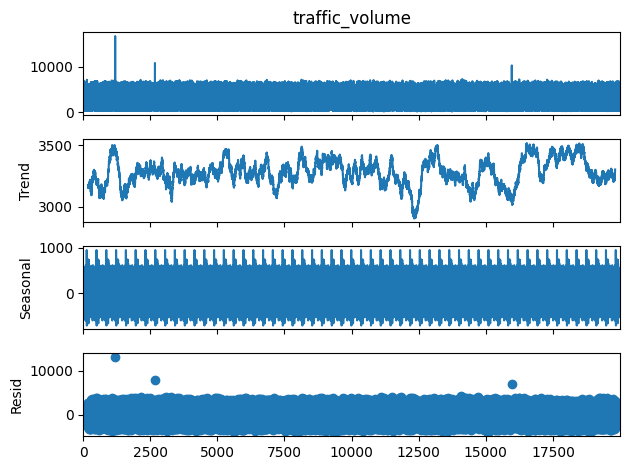

In [98]:
result1.plot()
plt.show()

In [99]:
#for temp
result2 = seasonal_decompose(df['temp'],model='additive',period=365)

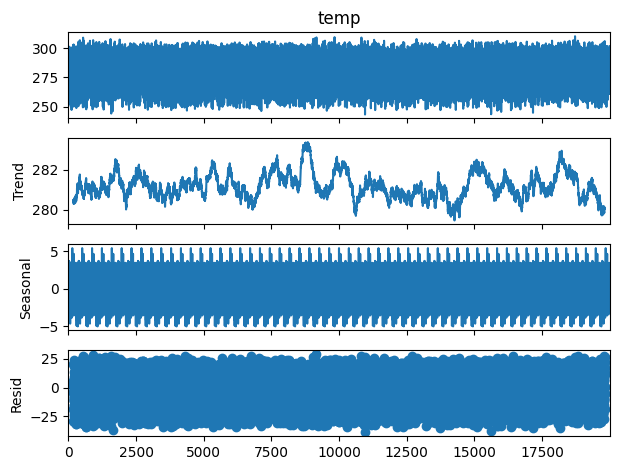

In [100]:
result2.plot()
plt.show()

In [49]:
#for rain_1h
result3 = seasonal_decompose(df['rain_1h'],model='additive',period=365)

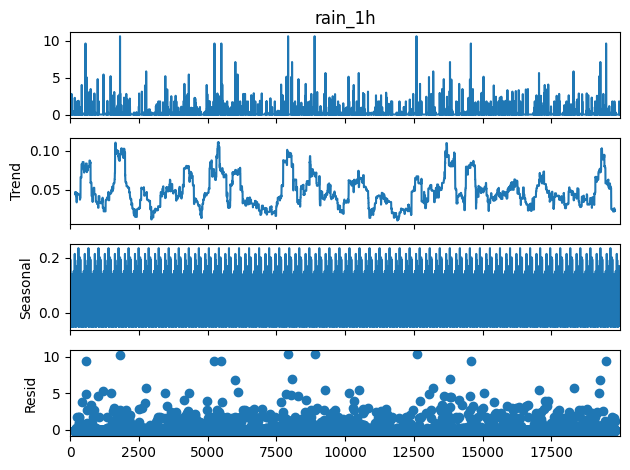

In [50]:
result3.plot()
plt.show()

In [55]:
#for clouds_all
result4 = seasonal_decompose(df['rain_1h'],model='additive',period=265)

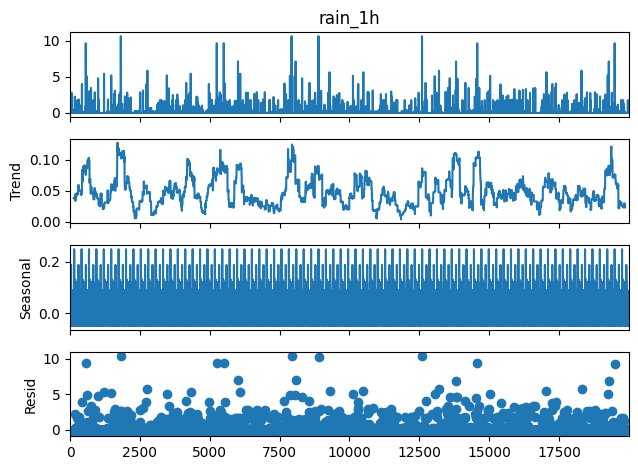

In [56]:
result4.plot()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x78dddce2b9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x78dddce2ba90>,
 'boxes': [<matplotlib.lines.Line2D at 0x78dddce2b880>,
 'medians': [<matplotlib.lines.Line2D at 0x78dddce29ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x78dddce2ba30>,
 'means': []}

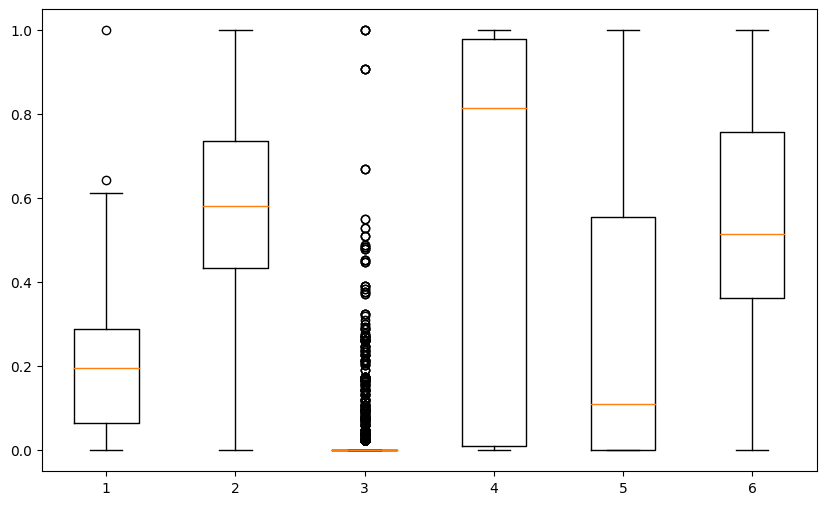

In [111]:
plt.figure(figsize=(10,6))
plt.boxplot(train_scaled)

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [9]:
# I handline in the previous sections beacause it necessary before this section

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [62]:
df.head()

,traffic_volume,temp,rain_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [16]:
df['weather_description'].unique()

array(['mist', 'sky is clear', 'broken clouds', 'moderate rain',
       'proximity shower rain', 'proximity thunderstorm', 'fog',
       'light rain', 'overcast clouds', 'light intensity drizzle',
       'scattered clouds', 'proximity thunderstorm with rain',
       'light snow', 'haze', 'few clouds', 'heavy intensity rain', 'snow',
       'drizzle', 'heavy intensity drizzle', 'thunderstorm',
       'Sky is Clear', 'heavy snow', 'thunderstorm with heavy rain',
       'light shower snow', 'shower drizzle',
       'thunderstorm with light rain', 'thunderstorm with rain',
       'thunderstorm with light drizzle',
       'proximity thunderstorm with drizzle', 'smoke',
       'light intensity shower rain', 'sleet', 'light rain and snow',
       'freezing rain'], dtype=object)

In [64]:
df['weather_main'].unique()

array(['Mist', 'Clear', 'Clouds', 'Rain', 'Thunderstorm', 'Fog',
       'Drizzle', 'Snow', 'Haze', 'Smoke'], dtype=object)

In [10]:
#using the labelencoder for catagre valuble
label = LabelEncoder()
df['weather_description'] = label.fit_transform(df['weather_description'])
df['weather_main'] = label.fit_transform(df['weather_main'])


In [11]:
#change the type of date
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.set_index('date_time')

In [12]:
df.head()

,traffic_volume,temp,rain_1h,clouds_all,weather_main,weather_description
date_time,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,90,5,16
2018-09-06 23:00:00,1248.0,286.01,0.0,1,0,25
2017-08-25 18:00:00,4602.0,293.69,0.0,75,1,1
2017-11-09 22:00:00,2838.0,262.35,0.0,1,0,25
2017-11-09 15:00:00,5794.0,267.08,0.0,5,0,25


In [13]:
# i will shift it to 3 beacause the rocord done evrey 3 yimes
df['prev_traffic_volume'] = df['traffic_volume'].shift(3)

In [16]:
df['prev_traffic_volume'].isnull().sum()


0

In [15]:
df.fillna(df['prev_traffic_volume'].mean(),inplace=True)

In [17]:
df['Day_of_the_week'] = df.index.dayofweek
df['month'] = df.index.month
df['day_of_the_year'] = df.index.dayofyear

In [18]:
df.head()

,traffic_volume,temp,rain_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,Day_of_the_week,month,day_of_the_year
date_time,,,,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,90,5,16,3278.093651,6,8,239
2018-09-06 23:00:00,1248.0,286.01,0.0,1,0,25,3278.093651,3,9,249
2017-08-25 18:00:00,4602.0,293.69,0.0,75,1,1,3278.093651,4,8,237
2017-11-09 22:00:00,2838.0,262.35,0.0,1,0,25,1209.000000,3,11,313
2017-11-09 15:00:00,5794.0,267.08,0.0,5,0,25,1248.000000,3,11,313


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [19]:
df.head()

,traffic_volume,temp,rain_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,Day_of_the_week,month,day_of_the_year
date_time,,,,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,90,5,16,3278.093651,6,8,239
2018-09-06 23:00:00,1248.0,286.01,0.0,1,0,25,3278.093651,3,9,249
2017-08-25 18:00:00,4602.0,293.69,0.0,75,1,1,3278.093651,4,8,237
2017-11-09 22:00:00,2838.0,262.35,0.0,1,0,25,1209.000000,3,11,313
2017-11-09 15:00:00,5794.0,267.08,0.0,5,0,25,1248.000000,3,11,313


In [20]:
# spilt my data to train and test
treain_spilt = round(len(df)*0.8)
train_set = df[:treain_spilt]
test_set = df[treain_spilt:]

In [21]:
train_set.shape,test_set.shape

((16000, 10), (4000, 10))

In [153]:
train_set

,traffic_volume,temp,rain_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,Day_of_the_week,month,day_of_the_year
date_time,,,,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.00,90,5,16,3278.093651,6,8,239
2018-09-06 23:00:00,1248.0,286.01,0.00,1,0,25,3278.093651,3,9,249
2017-08-25 18:00:00,4602.0,293.69,0.00,75,1,1,3278.093651,4,8,237
2017-11-09 22:00:00,2838.0,262.35,0.00,1,0,25,1209.000000,3,11,313
2017-11-09 15:00:00,5794.0,267.08,0.00,5,0,25,1248.000000,3,11,313
...,...,...,...,...,...,...,...,...,...,...
2018-08-26 23:00:00,1208.0,296.89,1.78,40,6,17,277.000000,6,8,238
2017-11-22 14:00:00,5916.0,269.68,0.00,90,8,15,500.000000,2,11,326
2018-02-07 19:00:00,3307.0,259.57,0.00,40,1,23,5019.000000,2,2,38


In [22]:
# Prepare the data
def create(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0:dataset.shape[1]]
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [23]:
df.head()

,traffic_volume,temp,rain_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,Day_of_the_week,month,day_of_the_year
date_time,,,,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,90,5,16,3278.093651,6,8,239
2018-09-06 23:00:00,1248.0,286.01,0.0,1,0,25,3278.093651,3,9,249
2017-08-25 18:00:00,4602.0,293.69,0.0,75,1,1,3278.093651,4,8,237
2017-11-09 22:00:00,2838.0,262.35,0.0,1,0,25,1209.000000,3,11,313
2017-11-09 15:00:00,5794.0,267.08,0.0,5,0,25,1248.000000,3,11,313


In [55]:
sc = MinMaxScaler()
train_scaled = sc.fit_transform(train_set)
test_scaled = sc.fit_transform(test_set)

In [56]:
sce = StandardScaler()
train_scaled = sce.fit_transform(train_set)
test_scaled = sce.fit_transform(test_set)

In [57]:
X_train,y_train = create(train_scaled,11)
X_test,y_test = create(test_scaled,11)

In [58]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (15988, 11, 10)
y_train shape: (15988,)
X_test shape: (3988, 11, 10)
y_test shape: (3988,)


## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

# LSTM Model

In [59]:
model1 = Sequential()
model1.add(LSTM(64,  input_shape=(11, 10),activation='relu'))
#model1.add(LSTM(64))
model1.add(Dense(1,))

model1.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 64)                  │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,265 (75.25 KB)

 Trainable params: 19,265 (75.25 KB)

 Non-trainable params: 0 (0.00 B)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [61]:
# Train the model
model1a = model1.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.0110 - val_loss: 1.0052
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9926 - val_loss: 1.0032
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.0054 - val_loss: 1.0084
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.0011 - val_loss: 1.0066
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.0000 - val_loss: 1.0091
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.9984 - val_loss: 1.0063
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.9760 - val_loss: 1.0087
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.9877 - val_loss: 1.0143
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.9847 - val_loss: 1.0154
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.9701 - val_loss: 1.0174


### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [62]:
pred1 = model1.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [63]:
model1.evaluate(X_test,y_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0073


1.0173923969268799

In [64]:
return_rmse(y_test,pred1)

The root mean squared error is 1.0086587780880216.


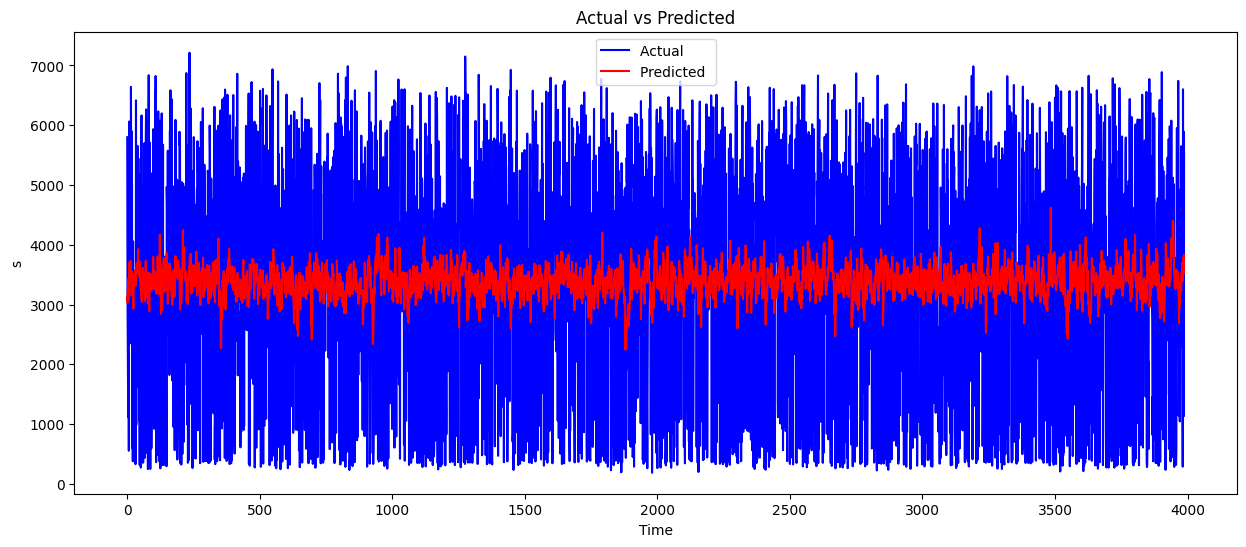

In [65]:
predictions_rescaled = sce.inverse_transform(np.concatenate((pred1, np.zeros((pred1.shape[0], 9))), axis=1))[:, 0]
Y_test_rescaled = sce.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 9))), axis=1))[:, 0]

plt.figure(figsize=(15,6))
plt.plot(Y_test_rescaled, label='Actual ', color='blue')
plt.plot(predictions_rescaled, label='Predicted ', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('s')
plt.legend()
plt.show()

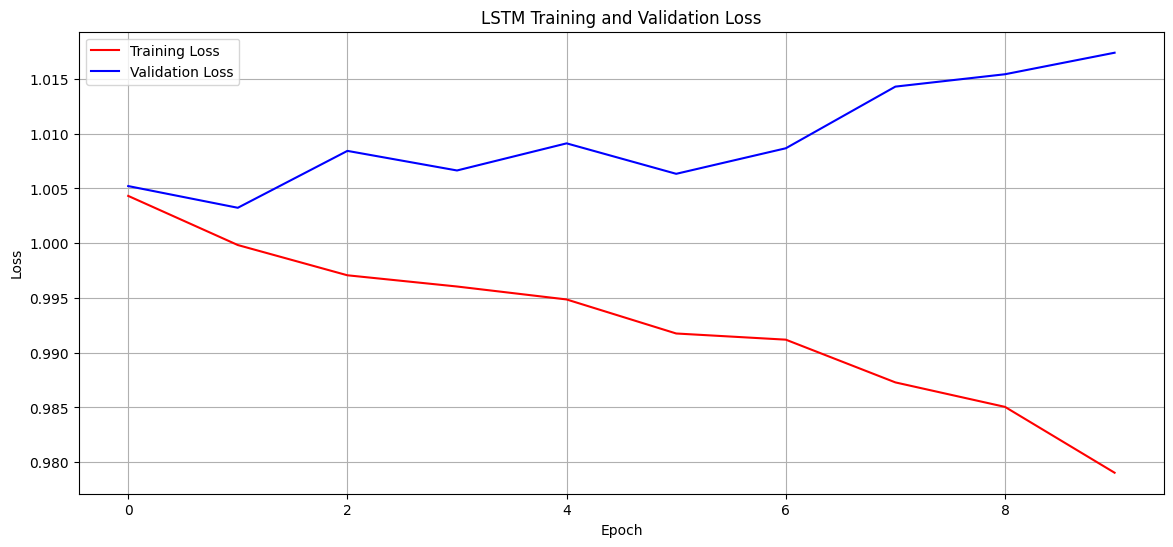

In [66]:
plt.figure(figsize=(14, 6))
plt.plot(model1a.history['loss'], label='Training Loss', color='red')
plt.plot(model1a.history['val_loss'], label='Validation Loss', color='blue')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

# I will use GRU model

In [68]:
model2 = Sequential()
model2.add(GRU(64, return_sequences=True, input_shape=(11, 10)))
model2.add(GRU(64))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mean_squared_error')

In [69]:
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                          │ (None, 11, 64)              │          14,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,617 (154.75 KB)

 Trainable params: 39,617 (154.75 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# Train the model
model2a=model2.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 1.0225 - val_loss: 1.0045
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.9999 - val_loss: 1.0040
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 1.0157 - val_loss: 1.0072
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.9933 - val_loss: 1.0067
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.9865 - val_loss: 1.0111
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.9930 - val_loss: 1.0174
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.9914 - val_loss: 1.0118
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - loss: 0.9997 - val_loss: 1.0173
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.9721 - val_loss: 1.0236
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.9709 - val_loss: 1.0339


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [71]:
pred2 = model2.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [72]:
model2.evaluate(X_test,y_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0255


1.0339457988739014

In [73]:
return_rmse(y_test,pred2)

The root mean squared error is 1.016831284076171.


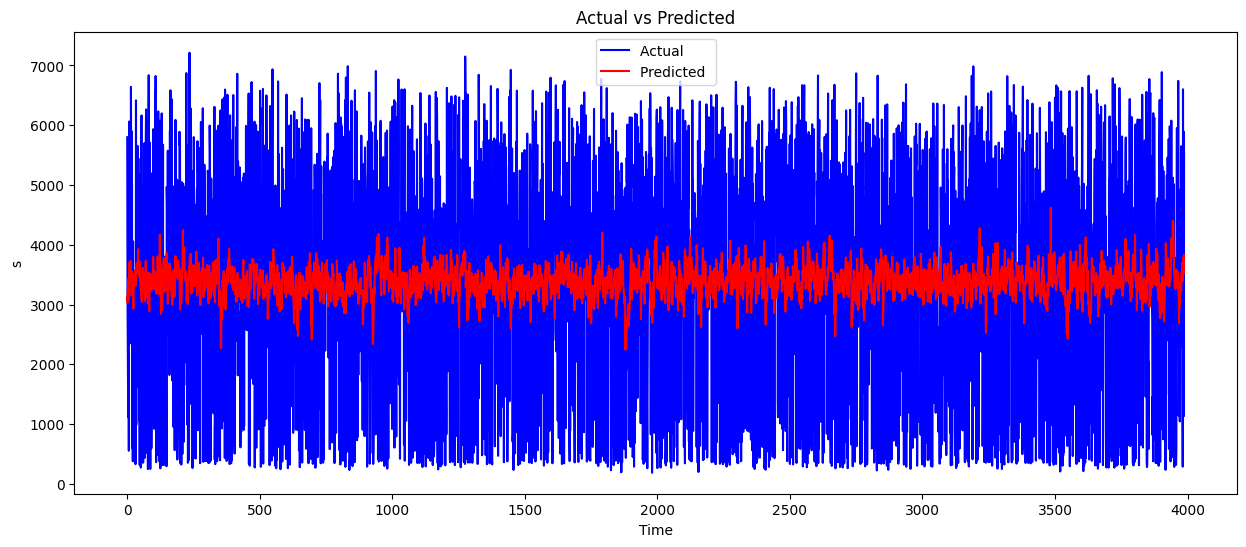

In [74]:
predictions_rescaled2 = sce.inverse_transform(np.concatenate((pred2, np.zeros((pred2.shape[0], 9))), axis=1))[:, 0]
y_test_rescaled2 = sce.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 9))), axis=1))[:, 0]

plt.figure(figsize=(15,6))
plt.plot(y_test_rescaled2, label='Actual ', color='blue')
plt.plot(predictions_rescaled, label='Predicted ', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('s')
plt.legend()
plt.show()

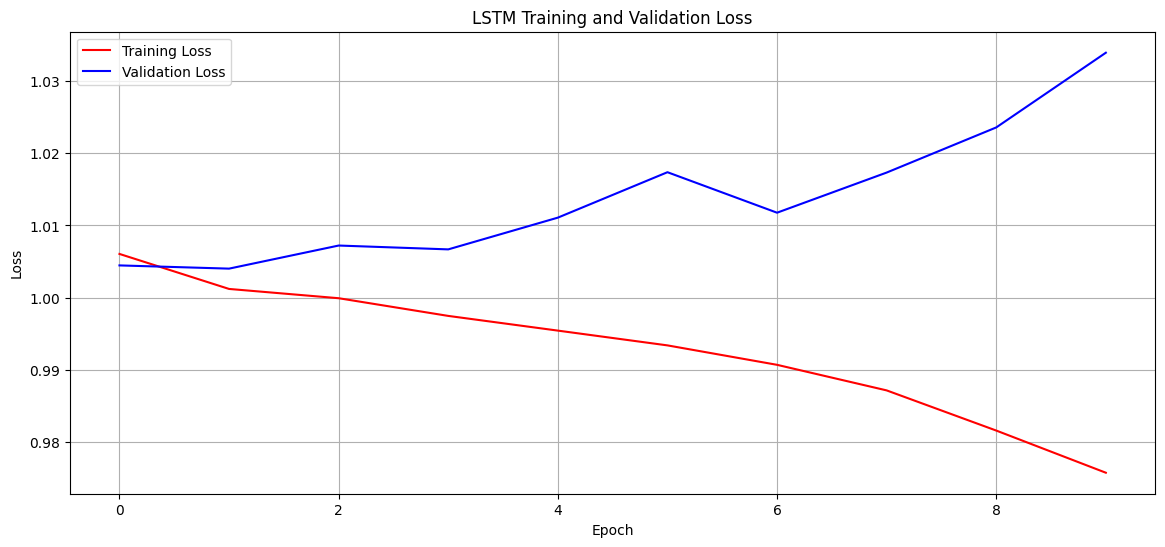

In [75]:
plt.figure(figsize=(14, 6))
plt.plot(model2a.history['loss'], label='Training Loss', color='red')
plt.plot(model2a.history['val_loss'], label='Validation Loss', color='blue')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

#Q1:
 i was handling missing values in first column with replace it with the mean because is numberical and is the best choice
for just 20 missing value and also drop the duplicate values

#Q2:
be shrunk the values that we wnt to predict

#Q3:
I first try with simple architecture and try it over again to get the best architecture that give the best accuray
but it doesn’t work with me and the accuray is bad

#Q4:
i use adam is the best for time series i have done before in the last week in class after trying over time with multiple optimizer and architecture also batch size and epoch is give the same result

#Q5:
i use RSME depend in my experience in last week and is give the best insight for my result

#Q6:

#Q7:
when the valedions is high and it doesn’t predict most of the test data

#Q8:

anlayz the data again and try another architecture for the model to improve my result

